# Chapter 5 Generalized Linear Models




## 5.1 Logistic regression

Assume that we have a binary outcome, where for $(X_i, y_i)$, $y_i \in \{0,1\}$, $X_i \in \mathbb{R}^p$. Recalling that a linear regression model produces fitted (and predicted) outcomes that take values in $\mathbb{R}$. It might seem inappropriate to build a model for $y_i, i=1,\ldots, n$ when using linear regression.

However, we should note that a linear regression model can still be of use with binary outcomes, when handling proper questions of interest. To be specific, a coefficient in linear regression is the difference in mean outcomes between two groups where the covariate differs by one. This interpretation of coefficient still applies regardless of the types of the outcomes (e.g., binary or continuous). That said, the issue still exists that the fitted outcome can take negative values, which makes linear regression somewhat undesirable for dealing with binary outcomes.

We note that the major issue is the discrepancy between the range of the actual outcome $y_i \in \{0,1\}$ and the fitted outcome $\hat{y}_i \in \mathbb{R}$ produced by the regression model. 
This can be addressed by considering an alternative summary measure of the outcome random variable $\{y_i\}_{i=1}^n$. In particular, we can take the following steps. 
- Let   $\pi_i = p(y_i=1|X_i) \in [0,1]$ be the probability of $y_i=1$ given the covariate $X_i$. ($\{0,1\}$ to $(0,1)$.)
- Let ${\rm odds}_i = \pi_i / (1-\pi_i) \in (0,\infty)$ be the odds. ($(0,1)$ to $(0,\infty)$.)
- Let ${\rm logodds}_i = \log [\pi_i / (1-\pi_i)] \in (-\infty,\infty)$ be the log odds. ($(0,\infty)$ to $(-\infty, \infty)$.)

We usually summarize these steps of transformations as the logit function ${\rm logit}(a) = \log(a/(1-a))$. 

Finally, we arrive at a "generalized" linear regression by replacing the left-hand side of 
$${E} [y|X_i]=X_i^{T} \beta$$ 

with ${\rm logit}(\pi_i)$, i.e.,
$$
{\rm logit}({E}[y_i|X_i])=X_i^{T} \beta.
$$

$$\pi_i = {E}[y_i|X_i]=p(y_i=1|X_i)$$



**Estimation** can be done with maximum likelihood estimation 
$$
\mathcal{L} = \prod_{i=1}^n \pi_i^{Y_i} (1-\pi_i)^{1-Y_i}.
$$
Taking the logarithm yields 
$$
\log \mathcal{L} = \sum_{i=1}^n \big[ Y_i \log \pi_i + (1-Y_i) \log (1-\pi_i)\big].
$$
If ${\rm logit}(\pi_i)=\beta_0$, we can derive that $\pi_i = \exp(\beta_0)/[\exp(\beta_0)+1]$. 
Hence, $\log \pi_i = \beta_0 - \log[\exp(\beta_0)+1]$ and $\log (1-\pi_i) = 0 - \log[\exp(\beta_0)+1]$. 

Plugging these into the log-likelihood yields 
$$
\log \mathcal{L} = n_1 \beta_0 - n\log[\exp(\beta_0)+1].
$$
The first order condition yields 
$$
\frac{n_1}{n} = \frac{\exp(\beta_0)  }{\exp(\beta_0)+1}.
$$

With covariates $X$, a closed form solution is not available. However, one can find the solution using optimization. 


**Interpretation** 

A key concept for the logistic regression is the **log odds ratio**, which is the interpretation of $\beta$. Consider $\beta_1$, we can see that 
$$
\beta_1= \log \left\{ \frac{ \pi(X_{1}+1,\cdots )/[1-\pi(X_{1}+1,\cdots )]}{\pi(X_{1},\cdots )/[1-\pi(X_{1},\cdots )]}    \right\}.
$$

The score function takes the form $U(\beta)= \partial \log \mathcal{L}/\partial \beta$. The MLE $\hat{\beta}$ satisfies that $U(\hat{\beta})=0$. The Fisher information is $I(\beta)=\mathbb{E} \big[-\partial^2 \log \mathcal{L}/\partial \beta^2 \big]$. The confidence interval for each $\beta_j$ is $\hat{\beta}_j \mp z_{1-\alpha/2} \hat{\rm se}(\hat{\beta}_j)$, where $z \sim N(0,1)$. 


The log odds ratio is of special interest in case-control studies, where the can still be transfered to general population. 


**Hypothesis testing**

Consider the following null and alternative hypotheses $H_0: \beta_1=0$ v.s. $H_1: \beta_1\neq 0$. There are three tests for this task. Note that all three tests are the same in linear regression, whereas they differ in the presence of nonlinearity. 

1. Likelihood ratio test. ${\rm LR}=-2 \big[ \log \mathcal{L}({\rm reduced}) -\log \mathcal{L}({\rm full}) \big]$. We have that ${\rm LR} \sim \chi^2_{K-k}$, under $H_0$ and large $n$. 

2. Score test. $S=U^T(\beta)I^{-1}(\beta)U(\beta) \sim \chi^2$ with $d.f.=1$.

3. Wald test. Robust wald test. For $K-k=1$, we have $W=\hat{\beta}_1/{\rm se}(\hat{\beta}_1) \sim N(0,1)$ under $H_0$ and large $n$. The robustness comes from a robust standard error. 



**Visualization**

Pearson residual: $r_{p_i}=(y_i-\hat{\pi}_i)/[\hat{\pi}_i(1-\hat{\pi}_i) ]^{1/2}$

Deviance residual: ${\rm dev}_i = {\rm sign}(Y_i-\hat{\pi}_i) \sqrt{ -2[Y_i \log \hat{\pi}_i +(1-Y_i)\log  (1-\hat{\pi}_i) ]}$.

One can define $H^2 = \sum r_{p_i}^2$ and $G^2 = \sum {\rm dev}_i^2$, which are similar to ${\rm SSE}$. They do not follow a $\chi^2$ distribution, but we can use them anyway. 



**Goodness-of-fit**

[Pseudo R squared](https://en.wikipedia.org/wiki/Pseudo-R-squared) "In logistic regression analysis, there is no agreed upon analogous measure, but there are several competing measures each with limitations."



[Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)


**Example**

In [2]:
# Examples (see also Chapter 6)
library(tidyverse)
hotel <- read_csv("../Data/hotel_bookings.csv") 
# Consider a smaller set:
#hotel<- hotel %>% select(is_canceled, adr, lead_time, total_of_special_requests, stays_in_week_nights, stays_in_weekend_nights, previous_cancellations)
#hotel<- hotel %>% mutate(is_canceled = (is_canceled==1));
#hotel<-hotel %>% filter(adr<1000)
#hotel<-hotel[1:1000,]





Rows: 119390 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): hotel, arrival_date_month, meal, country, market_segment, distrib...
dbl  (18): is_canceled, lead_time, arrival_date_year, arrival_date_week_numb...
date  (1): reservation_status_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
hotel<- hotel %>% dplyr::select(is_canceled, adr, lead_time, total_of_special_requests, stays_in_week_nights, stays_in_weekend_nights, previous_cancellations)
hotel<- hotel %>% mutate(is_canceled = (is_canceled==1));
hotel<- hotel %>% dplyr::filter(adr<1000)
hotel<- hotel[1:1000,]

In [4]:
## Predicting cancellations with a logistic regression

# lm(outcome~covariates, data=) 

mod.can.lg<-glm(
    is_canceled~adr+
                lead_time+ total_of_special_requests+ 
                stays_in_week_nights+ stays_in_weekend_nights+  
                previous_cancellations,
                data=hotel,
        family="binomial")

# generalized lm()
# glm() for lm(): family="gaussian"

summary(mod.can.lg)


Call:
glm(formula = is_canceled ~ adr + lead_time + total_of_special_requests + 
    stays_in_week_nights + stays_in_weekend_nights + previous_cancellations, 
    family = "binomial", data = hotel)

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -2.152957   0.273166  -7.881 3.24e-15 ***
adr                        0.010093   0.001663   6.070 1.28e-09 ***
lead_time                  0.004541   0.001332   3.408 0.000654 ***
total_of_special_requests -0.214969   0.081588  -2.635 0.008418 ** 
stays_in_week_nights       0.065369   0.046609   1.403 0.160766    
stays_in_weekend_nights   -0.216039   0.090933  -2.376 0.017511 *  
previous_cancellations           NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1256.7  on 999  degrees of freedom
Residual deviance: 12

In [5]:
library(MASS)
confint(mod.can.lg)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-2.698790059,-1.627269119
adr,0.006874508,0.013398096
lead_time,0.001983950,0.007246235
total_of_special_requests,-0.377017195,-0.056841114
stays_in_week_nights,-0.025752875,0.157152145
stays_in_weekend_nights,-0.395519797,-0.038729656
previous_cancellations,NA,NA


In [6]:
?confint.glm

confint                 package:stats                  R Documentation

_C_o_n_f_i_d_e_n_c_e _I_n_t_e_r_v_a_l_s _f_o_r _M_o_d_e_l _P_a_r_a_m_e_t_e_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Computes confidence intervals for one or more parameters in a
     fitted model.  There is a default and a method for objects
     inheriting from class ‘"lm"’.

_U_s_a_g_e:

     confint(object, parm, level = 0.95, ...)
     ## Default S3 method:
     confint(object, parm, level = 0.95, ...)
     ## S3 method for class 'lm'
     confint(object, parm, level = 0.95, ...)
     ## S3 method for class 'glm'
     confint(object, parm, level = 0.95, trace = FALSE, test=c("LRT", "Rao"), ...)
     ## S3 method for class 'nls'
     confint(object, parm, level = 0.95, ...)
     
_A_r_g_u_m_e_n_t_s:

  object: a fitted model object.

    parm: a specification of which parameters are to be given
          confidence intervals, either a vector of numbers or a

In [7]:
## Fitting a reduced model without lead_time
red.can.lg<-glm(is_canceled~adr+ total_of_special_requests+ stays_in_week_nights+ stays_in_weekend_nights+  previous_cancellations,data=hotel,
               family="binomial")


In [8]:
anova(red.can.lg,mod.can.lg, test='Chisq')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,995,1215.569,NA,NA,NA
2,994,1203.487,1,12.08235,0.0005090146


In [9]:
# Perform a likelihood ratio test
#install.packages('lmtest')
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [10]:
lrtest(red.can.lg,mod.can.lg) # from the lmtest package

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,-607.7844,NA,NA,NA
2,6,-601.7433,1,12.08235,0.0005090146


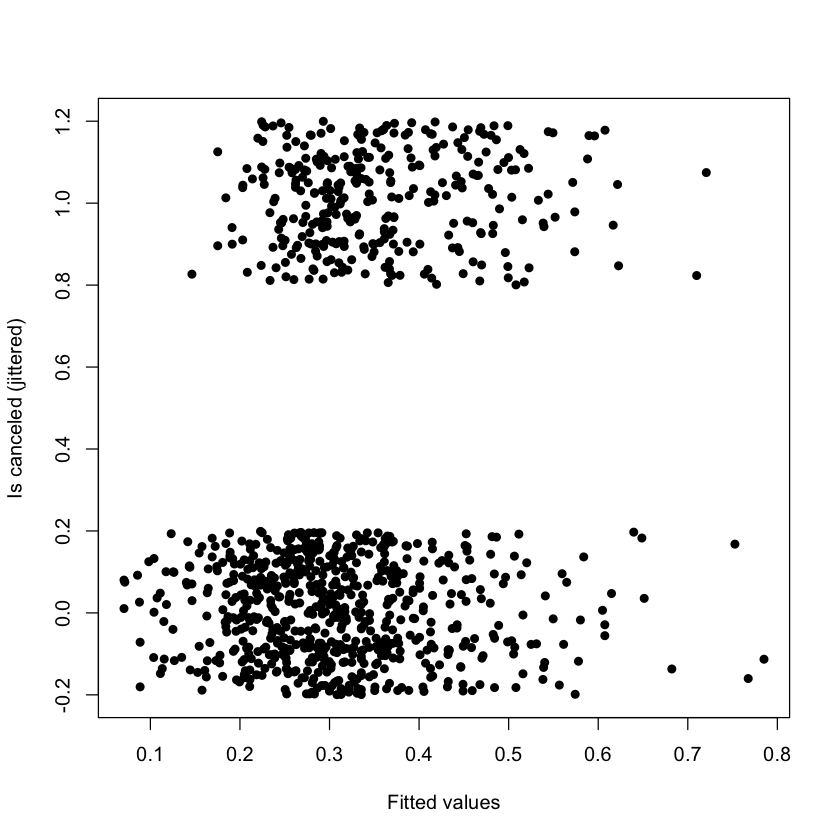

In [11]:

plot(jitter(mod.can.lg$y)~mod.can.lg$fitted.values,pch=16,xlab="Fitted values", ylab="Is canceled (jittered)")


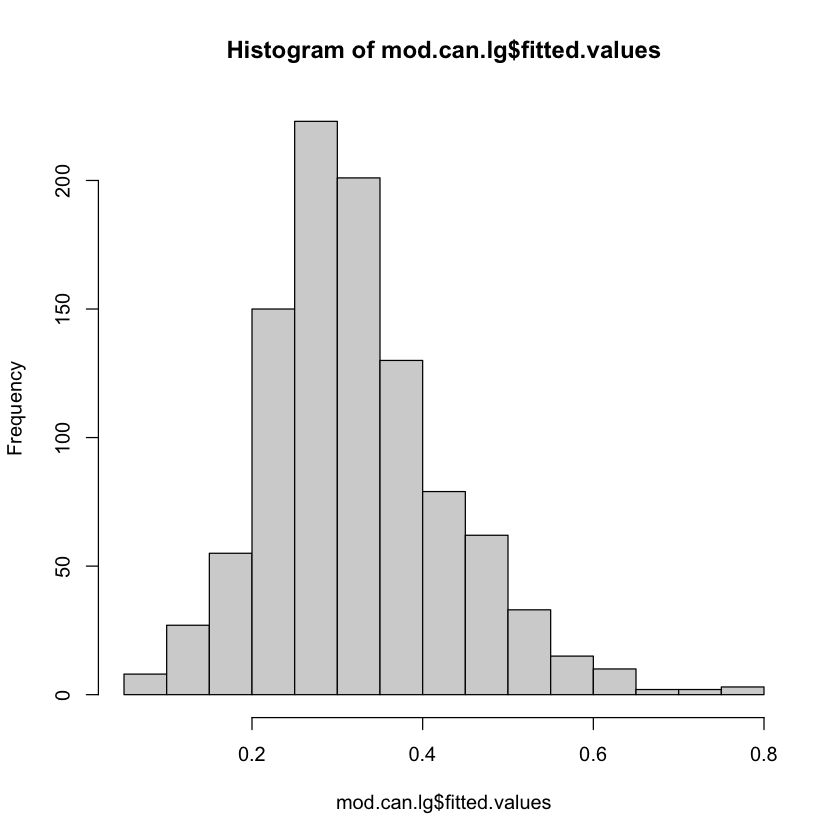

In [12]:
hist(mod.can.lg$fitted.values)

In [13]:
#sum(mod.can.lg$fitted.values>threshold)

threshold=0.2

TP= sum( (mod.can.lg$fitted.values>threshold) & mod.can.lg$y) ;
TP

TN= sum((mod.can.lg$fitted.values<threshold) & (!mod.can.lg$y));

TN

[1] 316

[1] 84

In [14]:
sum( mod.can.lg$y)

[1] 322

In [15]:
TN / sum(!mod.can.lg$y)

[1] 0.1238938

In [16]:
sum(!mod.can.lg$y)

[1] 678

In [17]:
threshold = 0.1;

TP= sum( (mod.can.lg$fitted.values>threshold) & mod.can.lg$y) ;

TN= sum((mod.can.lg$fitted.values<threshold) & (!mod.can.lg$y));


(TPR=TP / sum( mod.can.lg$y))  # among truly infected cases 

(FPR=1- TN/sum(!mod.can.lg$y)) # FPR = 1 - TNR  # among truly healthy cases 

[1] 1

[1] 0.9882006

In [18]:

grid<-seq(from=0,to=1,length.out=1000)
TPR=FPR=seq(from=0,to=1,length.out=1000)
for(i in 1:1000){
    threshold = grid[i];

TP= sum( (mod.can.lg$fitted.values>threshold) & mod.can.lg$y) ;

TN= sum((mod.can.lg$fitted.values<threshold) & (!mod.can.lg$y));


(TPR[i]=TP / sum( mod.can.lg$y))

(FPR[i]=1- TN/sum(!mod.can.lg$y))
    }




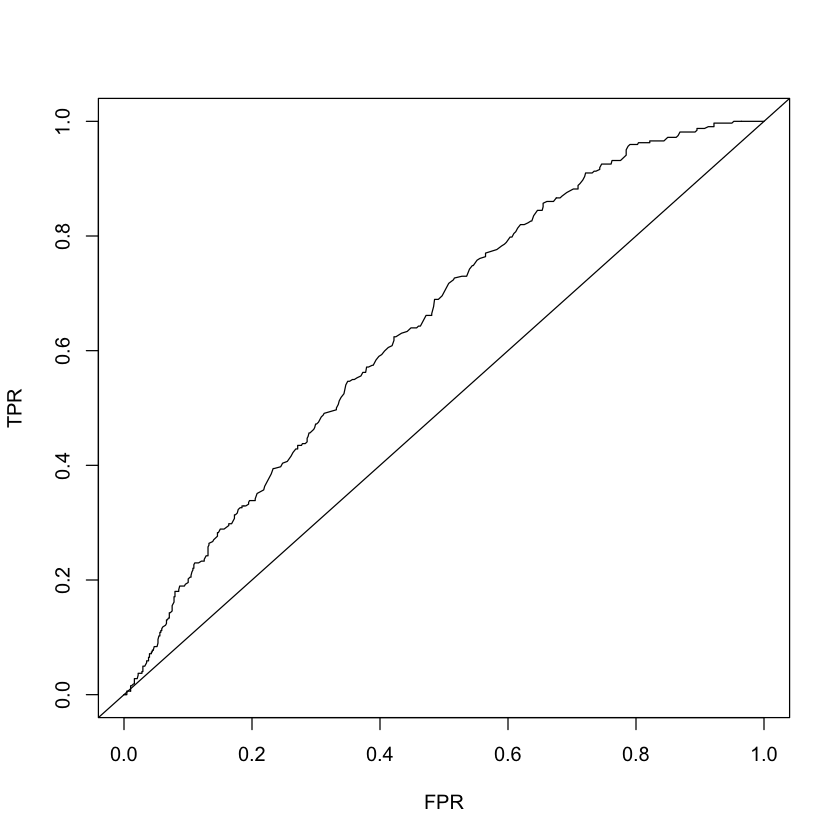

In [19]:
plot(TPR~FPR,type="l")
abline(a=0,b=1)

In [20]:
#install.packages('pscl')
library(pscl)
pR2(mod.can.lg)  # look for 'McFadden'


Classes and Methods for R originally developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University (2002-2015),
by and under the direction of Simon Jackman.
hurdle and zeroinfl functions by Achim Zeileis.



fitting null model for pseudo-r2


llh       llhNull            G2      McFadden          r2ML 
-601.74327577 -628.36782009   53.24908865    0.04237095    0.05185619 
         r2CU 
   0.07248371

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6435

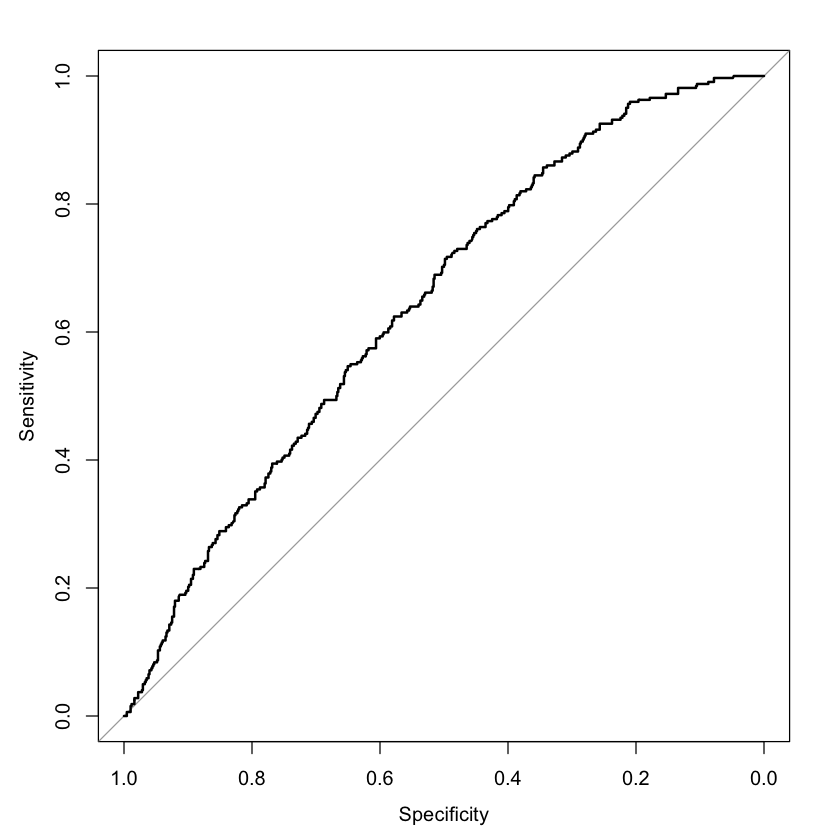

In [21]:
#install.packages('pROC')
library(pROC)
mod.can.lg.roc<-roc(mod.can.lg$y,mod.can.lg$fitted.values)
mod.can.lg.roc$auc
plot(mod.can.lg.roc)

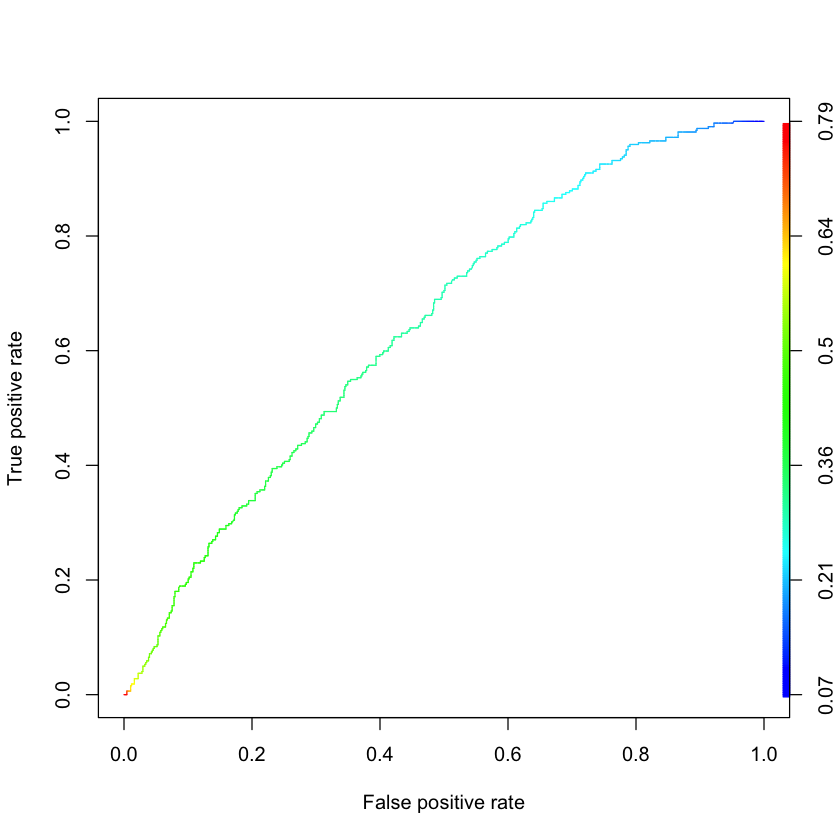

In [22]:
#install.packages('ROCR')
library(ROCR)
pred<-prediction(mod.can.lg$fitted.values,mod.can.lg$y)
perf<-performance(pred,"tpr","fpr")

plot(perf,colorize=TRUE)

## 5.2 Generalized linear model 

The logistic regression is a special case of the generalized linear model. 

Suppose that the outcome $y$ follows a distribution that belongs to **the exponential family** 
$$
p(y | \theta, \tau)= h(y,\tau) \exp\left\{ \frac{b(\theta) T(y)-A(\theta)  }{d(\tau)} \right\}.
$$
We usually use the canonical form 
$$
p(y | \theta, \tau)= h(y,\tau) \exp\left\{ \frac{\theta T(y)-A(\theta)  }{d \tau} \right\}.
$$

For regular use, we specify a GLM in the following manner. 

1. Pick an exponential form of distribution (of the error terms)
2. Set the predictor $X\beta$.
3. Pick a link function $g$ 
$$
\mathbb{E}[Y|X]=\mu = g^{-1}(y).
$$

Note that steps (1) and (3) are often tied. 


In [23]:
# Read the help file of glm()
?glm(y~covariates, family='')

# Key difference from lm():
# The argument "family"

?family

# error distribution( link function )
# e.g., 
# linear regression： gaussian(link = "identity") 
# logstics regression： binomial(link = "logit") 
# Poisson regression: poisson(link = "log")

glm                   package:stats                    R Documentation

_F_i_t_t_i_n_g _G_e_n_e_r_a_l_i_z_e_d _L_i_n_e_a_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘glm’ is used to fit generalized linear models, specified by
     giving a symbolic description of the linear predictor and a
     description of the error distribution.

_U_s_a_g_e:

     glm(formula, family = gaussian, data, weights, subset,
         na.action, start = NULL, etastart, mustart, offset,
         control = list(...), model = TRUE, method = "glm.fit",
         x = FALSE, y = TRUE, singular.ok = TRUE, contrasts = NULL, ...)
     
     glm.fit(x, y, weights = rep.int(1, nobs),
             start = NULL, etastart = NULL, mustart = NULL,
             offset = rep.int(0, nobs), family = gaussian(),
             control = list(), intercept = TRUE, singular.ok = TRUE)
     
     ## S3 method for class 'glm'
     weights(object, type = c("prior", "working"), ...)
     


family                  package:stats                  R Documentation

_F_a_m_i_l_y _O_b_j_e_c_t_s _f_o_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     Family objects provide a convenient way to specify the details of
     the models used by functions such as ‘glm’.  See the documentation
     for ‘glm’ for the details on how such model fitting takes place.

_U_s_a_g_e:

     family(object, ...)
     
     binomial(link = "logit")
     gaussian(link = "identity")
     Gamma(link = "inverse")
     inverse.gaussian(link = "1/mu^2")
     poisson(link = "log")
     quasi(link = "identity", variance = "constant")
     quasibinomial(link = "logit")
     quasipoisson(link = "log")
     
_A_r_g_u_m_e_n_t_s:

    link: a specification for the model link function.  This can be a
          name/expression, a literal character string, a length-one
          character vector, or an object of class ‘"link-glm"’ (such as
          generated by ‘make.link’

In [24]:
# use, e.g., lrtest() for likelihood ratio tests (for nested models)
?lrtest

lrtest                 package:lmtest                  R Documentation

_L_i_k_e_l_i_h_o_o_d _R_a_t_i_o _T_e_s_t _o_f _N_e_s_t_e_d _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘lrtest’ is a generic function for carrying out likelihood ratio
     tests.  The default method can be employed for comparing nested
     (generalized) linear models (see details below).

_U_s_a_g_e:

      lrtest(object, ...)
     
      ## Default S3 method:
     lrtest(object, ..., name = NULL) 
     
      ## S3 method for class 'formula'
     lrtest(object, ..., data = list())
     
_A_r_g_u_m_e_n_t_s:

  object: an object. See below for details.

     ...: further object specifications passed to methods. See below
          for details.

    name: a function for extracting a suitable name/description from a
          fitted model object. By default the name is queried by
          calling ‘formula’.

    data: a data frame containing the variables in

In [25]:
# use confint() in the MASS package for constructing confidence intervals
library(MASS) # a generic confint() is in the stat package
?confint()

confint                 package:stats                  R Documentation

_C_o_n_f_i_d_e_n_c_e _I_n_t_e_r_v_a_l_s _f_o_r _M_o_d_e_l _P_a_r_a_m_e_t_e_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Computes confidence intervals for one or more parameters in a
     fitted model.  There is a default and a method for objects
     inheriting from class ‘"lm"’.

_U_s_a_g_e:

     confint(object, parm, level = 0.95, ...)
     ## Default S3 method:
     confint(object, parm, level = 0.95, ...)
     ## S3 method for class 'lm'
     confint(object, parm, level = 0.95, ...)
     ## S3 method for class 'glm'
     confint(object, parm, level = 0.95, trace = FALSE, test=c("LRT", "Rao"), ...)
     ## S3 method for class 'nls'
     confint(object, parm, level = 0.95, ...)
     
_A_r_g_u_m_e_n_t_s:

  object: a fitted model object.

    parm: a specification of which parameters are to be given
          confidence intervals, either a vector of numbers or a